# Task 1

## Text preprocessing

In [ ]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

nlp = spacy.load("en_core_web_sm")

text = "KBTU University has room for improvement in providing adequate resources and support to its students."

doc = nlp(text)
tokens = [token.text for token in doc if not token.is_stop]

no_garbage_tokens = [token.lemma_ for token in doc if not token.is_stop]

print("Original text:", text)
print("Tokenized and stopwords removed:", tokens)
print("Lemmatized:", no_garbage_tokens)

Original text: KBTU University has room for improvement in providing adequate resources and support to its students.
Tokenized and stopwords removed: ['KBTU', 'University', 'room', 'improvement', 'providing', 'adequate', 'resources', 'support', 'students', '.']
Lemmatized: ['KBTU', 'University', 'room', 'improvement', 'provide', 'adequate', 'resource', 'support', 'student', '.']


## Word2Vec

In [ ]:
import gensim
from gensim.models import Word2Vec

sentences = [tokens]

model_cbow = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4, sg=0)
model_sg = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4, sg=1)

model_cbow.save("word2vec_cbow.model")
model_sg.save("word2vec_sg.model")

In [ ]:
model_cbow = Word2Vec.load("word2vec_cbow.model")
model_sg = Word2Vec.load("word2vec_sg.model")

cbow_vector = model_cbow.wv['support']
sg_vector = model_sg.wv['support']

## GloVe

In [ ]:
import gensim.downloader as api

glove_vectors = api.load("glove-wiki-gigaword-100")

glove_vector = glove_vectors['support']


## FastText

In [ ]:
from gensim.models import FastText

model_ft = FastText(sentences, vector_size=100, window=5, min_count=1, workers=4)

model_ft.save("fasttext.model")


In [ ]:
model_ft = FastText.load("fasttext.model")

ft_vector = model_ft.wv['support']


## Cosine simularity

Cosine Similarity (GloVe vs FastText): [[0.02943169]]
Cosine Similarity (GloVe vs Word2Vec CBOW): [[-0.08365892]]
Cosine Similarity (GloVe vs Word2Vec Skip-gram): [[-0.08365892]]
Cosine Similarity (FastText vs Word2Vec CBOW): [[0.29707655]]
Cosine Similarity (FastText vs Word2Vec Skip-gram): [[0.29707655]]
Cosine Similarity (Word2Vec CBOW vs Skip-gram): [[0.99999994]]


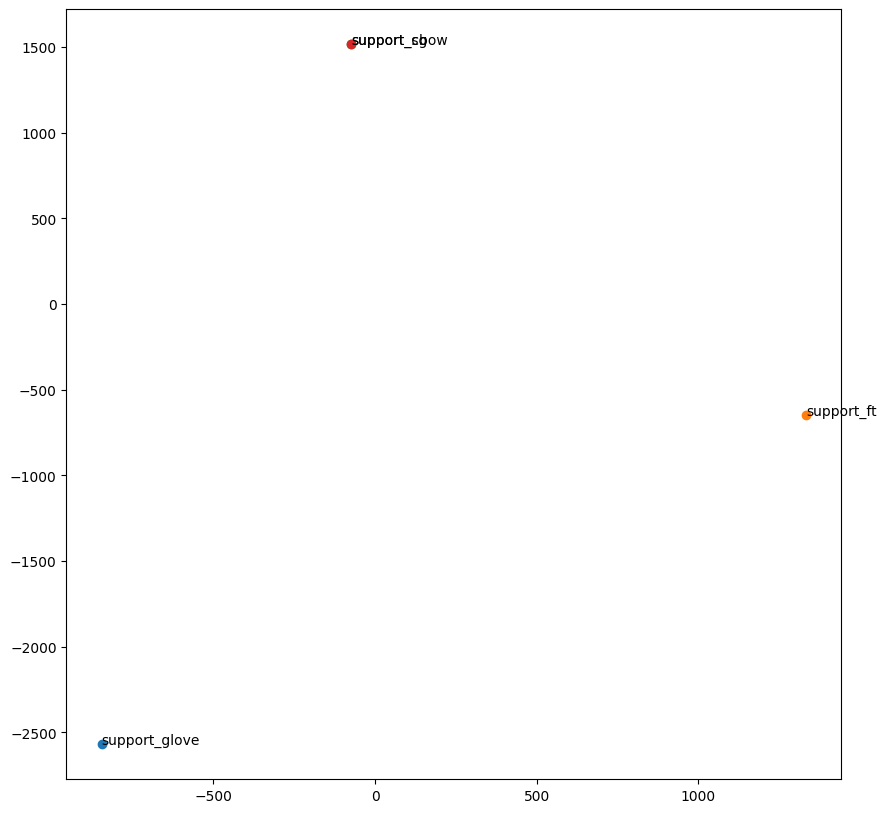

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

glove_vector = glove_vectors['support']
ft_vector = model_ft.wv['support']
cbow_vector = model_cbow.wv['support']
sg_vector = model_sg.wv['support']

glove_vector = np.array(glove_vector).reshape(1, -1)
ft_vector = np.array(ft_vector).reshape(1, -1)
cbow_vector = np.array(cbow_vector).reshape(1, -1)
sg_vector = np.array(sg_vector).reshape(1, -1)

similarity_glove_ft = cosine_similarity(glove_vector, ft_vector)
print("Cosine Similarity (GloVe vs FastText):", similarity_glove_ft)

similarity_glove_cbow = cosine_similarity(glove_vector, cbow_vector)
print("Cosine Similarity (GloVe vs Word2Vec CBOW):", similarity_glove_cbow)

similarity_glove_sg = cosine_similarity(glove_vector, sg_vector)
print("Cosine Similarity (GloVe vs Word2Vec Skip-gram):", similarity_glove_sg)

similarity_ft_cbow = cosine_similarity(ft_vector, cbow_vector)
print("Cosine Similarity (FastText vs Word2Vec CBOW):", similarity_ft_cbow)

similarity_ft_sg = cosine_similarity(ft_vector, sg_vector)
print("Cosine Similarity (FastText vs Word2Vec Skip-gram):", similarity_ft_sg)

similarity_cbow_sg = cosine_similarity(cbow_vector, sg_vector)
print("Cosine Similarity (Word2Vec CBOW vs Skip-gram):", similarity_cbow_sg)

word_embeddings = np.array([glove_vector.flatten(), ft_vector.flatten(), cbow_vector.flatten(), sg_vector.flatten()])

words = [
    'support_glove',
    'support_ft',
    'support_cbow',
    'support_sg'
]

tsne = TSNE(n_components=2, perplexity=2)
word_embeddings_2d = tsne.fit_transform(word_embeddings)

plt.figure(figsize=(10, 10))
for i, word in enumerate(words):
    plt.scatter(word_embeddings_2d[i, 0], word_embeddings_2d[i, 1])
    plt.annotate(word, (word_embeddings_2d[i, 0], word_embeddings_2d[i, 1]))
plt.show()

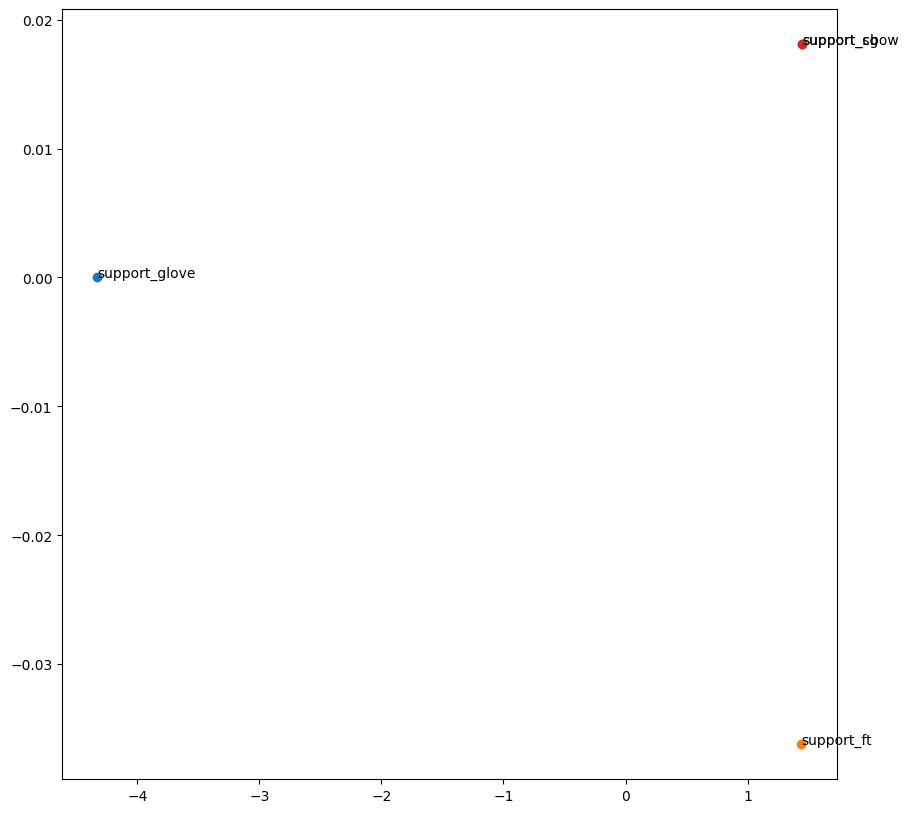

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
word_embeddings_2d = pca.fit_transform(word_embeddings)

plt.figure(figsize=(10, 10))
for i, word in enumerate(words):
    plt.scatter(word_embeddings_2d[i, 0], word_embeddings_2d[i, 1])
    plt.annotate(word, (word_embeddings_2d[i, 0], word_embeddings_2d[i, 1]))
plt.show()